# AGE vs INCIDENCE OF HEART DISEASE

## BACKGROUND:
Our group started with a mostly clean dataset from kaggle.com, "Cardiovascular Diseases Risk Prediction Dataset", which was derived from the "2021 BRFSS Dataset from the CDC". The kaggle.com author chose 19 of the 304 unique variables relating "to lifestyle factors of a person that can be contributed to being at risk with any form of Cardiovascular Diseases".

## QUESTION: 
Looking at the provided dataset fro kaggle.com, is there a relationship between age and the incidence of cardio vacular (heart) disease (CVD)? Additionally, based on the collected data, are there comorbidities or other factors which conincide with a greater/lower incidence of heart disease?

In [26]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

#Import csv data and use Pandas to create a Data Frame
cleaned_data = pd.read_csv("../Resources/Cleaned_CVD.csv")

# drop unamed excess column
cleaned_data = cleaned_data.drop(["Unnamed: 0"], axis=1)
cleaned_data


,General Health,Checkup,Exercise,Heart Disease,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol (Servings/Month),Fruit (Servings/Month),Green Vegetables (Servings/Month),Fried Potato (Servings/Month)
0,Poor,<2,No,No,No,No,No,None,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,<1,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,<1,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,<1,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,<1,No,No,No,No,No,None,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,<1,Yes,No,No,No,No,None,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,<5,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5+,Yes,No,No,No,Yes,Pregnacy-Induced,No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,<1,Yes,No,No,No,No,None,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


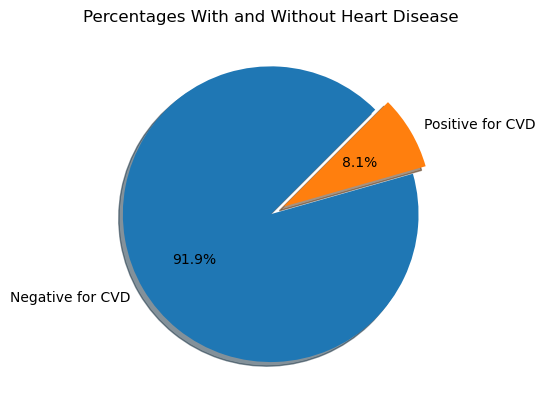

In [3]:
# Want to determine the correlations between age along with other factors and incidents of heart disease.
# start with pie chart showing what percentages of those surveyed have heart disease
# get len of dataframe
tot_survey = len(cleaned_data)
tot_survey

# create an exploded pie chart showing percent heart disease
labels = ["Negative for CVD", "Positive for CVD"]
sizes = cleaned_data["Heart Disease"].value_counts()

explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45)
plt.title("Percentages With and Without Heart Disease")
plt.show()


# % Positive for CVD vs % Negative for CVD
We see from the pie chart above roughly 8% of the total population of approximately 309k surveyed were Positive for CVD.

Let's explore whether there is a correlation between Age and the incidence of CVD, along with other possible contributing factors we may see in the data.

First, we need to take a look at the "Age Category" data and determine if we see a skew in the prevelance of heart disease at certain ages.

In [6]:
# Pos HD counts by age group
print(len(pos_hd))
age_counts = pos_hd["Age Category"].value_counts()
age_counts

24971


80+      4856
70-74    4561
65-69    3823
75-79    3752
60-64    3012
55-59    1991
50-54    1181
45-49     678
40-44     435
35-39     274
30-34     201
25-29     113
18-24      94
Name: Age Category, dtype: int64

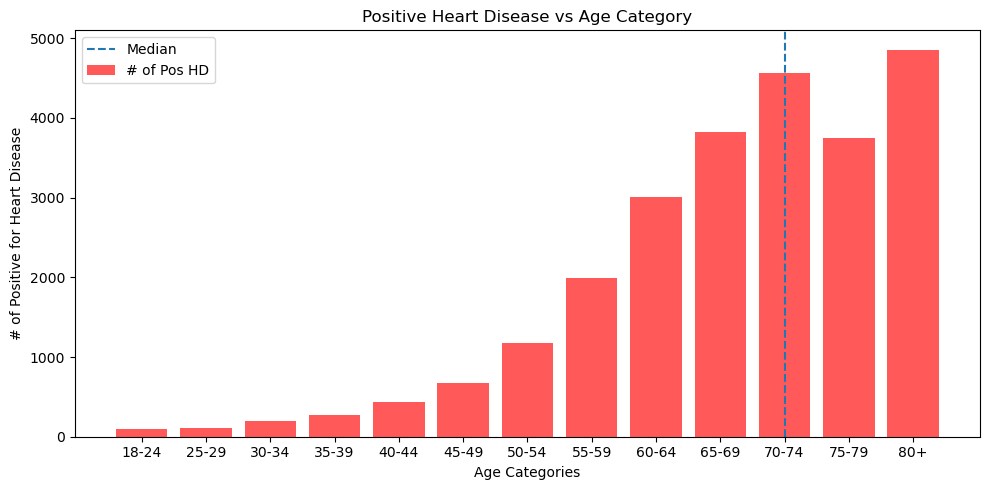

In [78]:
# create a histogram showing essentially how many people in each age group have heart disease.
pos_hd = cleaned_data.loc[cleaned_data["Heart Disease"] == "Yes"]
neg_hd = cleaned_data.loc[cleaned_data["Heart Disease"] == "No"]

age_grouped = pos_hd.groupby("Age Category").count()
age_grouped

age_median = np.median(age_grouped)
age_median

x_axis = np.arange(len(age_grouped))

# Set figure size to make data clearer to read
plt.figure(figsize=(10,5))

x_values = age_grouped.index
y_values = age_grouped["Heart Disease"]

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, age_grouped.index)

plt.bar(x_axis, y_values, color='r', alpha=0.65, align="center", label="# of Pos HD")
plt.title("Positive Heart Disease vs Age Category")
plt.xlabel("Age Categories")
plt.ylabel("# of Positive for Heart Disease")

# plot the median 
plt.axvline(x=10,ls='--', label="Median")
plt.legend(loc="best")

plt.tight_layout()
plt.show()


Here we see a definite skew towards a higher rate of heart disease as we increase the Age Category. More than 88% of the positive cases appear in participants 55 years or older, which only represents approx half of the people surveyed (54.4%).

Using the total count of postive cases of heart disease divided by 2, and the Age Category counts, I was able to determien the median of the positive cases lies in the 70-74 Age Category. Again, showing more than 50% of the cases lie somewhere above the 70 year gae mark.

It is clear there is a relationship between an older age and incidence of heart disease.

Determine if the age distribution of respondents is equal across all age groups.

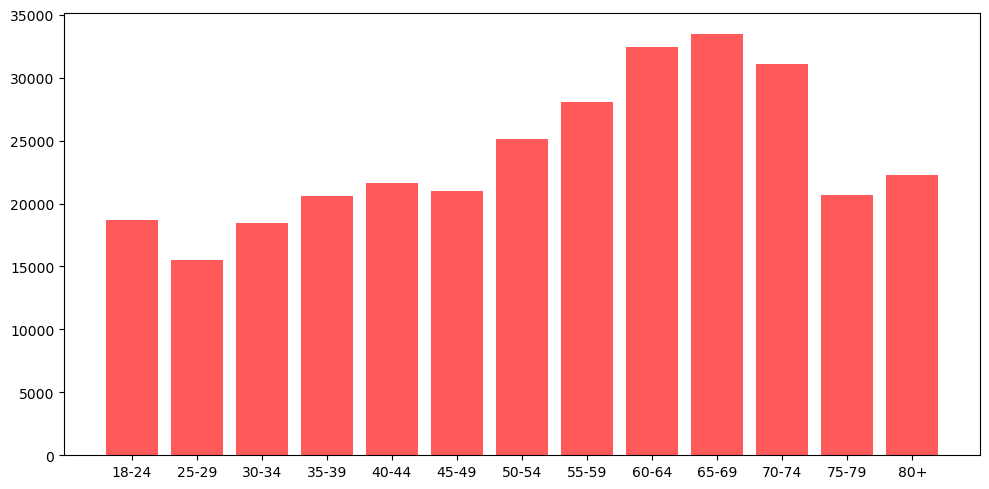

In [19]:
# Is there an even distribution in the sampling data age groups

age_grouped = cleaned_data.groupby("Age Category").count()
age_grouped

x_axis = np.arange(len(age_grouped))

# NOTE: Need to determine why figsize isn't working
plt.figure(figsize=(10, 5))

x_values = age_grouped.index
y_values = age_grouped["General Health"]

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, age_grouped.index)

plt.bar(x_axis, y_values, color='r', alpha=0.65, align="center")

plt.tight_layout()
plt.show()


To see if the distribution of positive heart disease cases across age groups matched the percentage of heart disease for the entire sample, a chi square test was performed on the expected number of pos cases per age group based on the overall pecentage of the group, versus the observed number of cases per age group.

Using 12 degrees of freedom and 95% confidence we calculate a criticla value of approx 21.03. When we run the chi square analysis, we get a statistical value of 16574.54, WELL ABOVE the 21.03. Additionally, the returned p-value is so low as to register as 0.0.

Clearly, the results are significant and we can reject the Null Hypothesis that the # percent of pos cases per age group matches the overall percent of the dataset.

In [50]:
# Age Category versus Pos Heart Disease Chi square testing. . .
# Null: % of Pos Heart Disease in each age group is within 95% confidence
# Alternative: They are not, and age is related to the incidence of heart disease
# use 95% confidence level

# create cleaned age count dataframe
cl_age_count = pd.DataFrame(cleaned_data["Age Category"].value_counts())
# add observed and default columns
cl_age_count["obs_pos_hd"] = pos_hd["Age Category"].value_counts()
cl_age_count["exp_pos_hd"] = round((cl_age_count["Age Category"] * 0.08085))
print(cl_age_count)

print(cl_age_count["obs_pos_hd"].sum())
print(cl_age_count["exp_pos_hd"].sum())

# evalute p-value and chi square
# determine critical value
# degree of freedom = 13 - 1 = 12
critical_value = stats.chi2.ppf(q=0.95, df=12)
print(critical_value)

# run chi square
stats.chisquare(cl_age_count['obs_pos_hd'], cl_age_count['exp_pos_hd'])


       Age Category  obs_pos_hd  exp_pos_hd
65-69         33434        3823      2703.0
60-64         32418        3012      2621.0
70-74         31103        4561      2515.0
55-59         28054        1991      2268.0
50-54         25097        1181      2029.0
80+           22271        4856      1801.0
40-44         21595         435      1746.0
45-49         20968         678      1695.0
75-79         20705        3752      1674.0
35-39         20606         274      1666.0
18-24         18681          94      1510.0
30-34         18428         201      1490.0
25-29         15494         113      1253.0
24971
24971.0
21.02606981748307


Power_divergenceResult(statistic=16574.542596877378, pvalue=0.0)

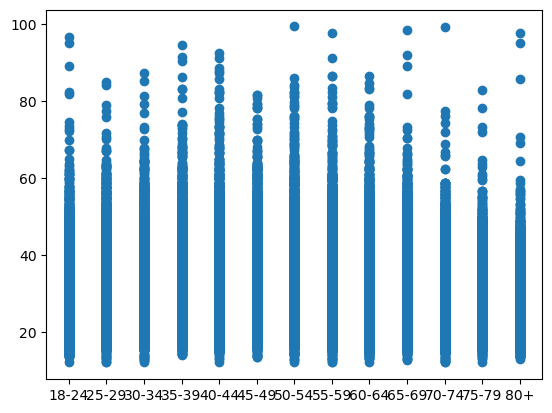

In [7]:
# do we begin to feel more ill as we get older?
# scatter plot of age versus weight sized by BMI
age_sorted_clean = cleaned_data.sort_values(by="Age Category")

x_values = age_sorted_clean["Age Category"]
y_values = age_sorted_clean["BMI"]

plt.scatter(x_values, y_values)

plt.show()

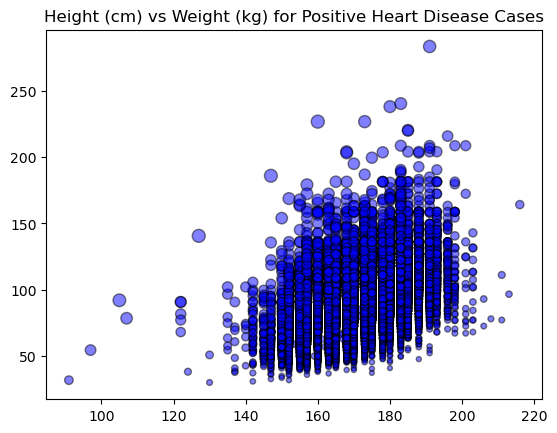

In [5]:
# height, weigh, bmi and heart disease
x_values = pos_hd["Height (cm)"]
y_values = pos_hd["Weight (kg)"]

plt.scatter(x_values, y_values, color='blue', s=pos_hd["BMI"], edgecolors="black", alpha=0.5)
plt.title("Height (cm) vs Weight (kg) for Positive Heart Disease Cases")
plt.show()

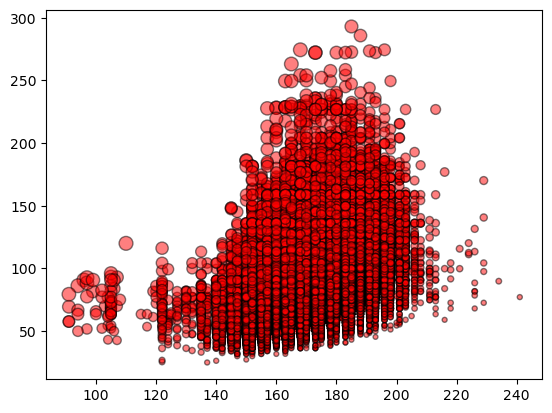

In [6]:
# height, weight, bmi and no heart disease

x_values = neg_hd["Height (cm)"]
y_values = neg_hd["Weight (kg)"]

plt.scatter(x_values, y_values, color='red', s=neg_hd["BMI"], edgecolors="black", alpha=0.5)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

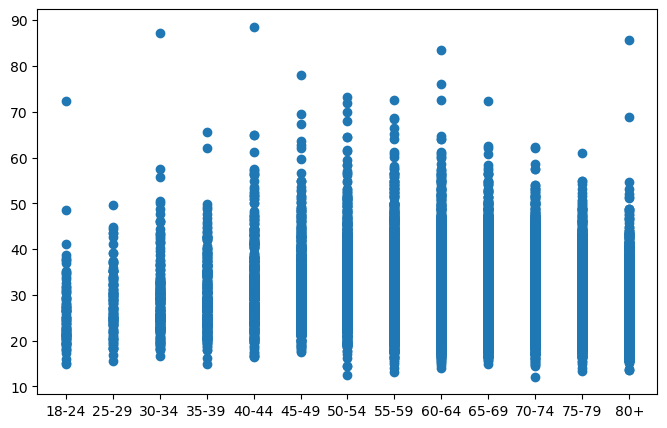

In [8]:
# bmi versus age, positive for heart disease
pos_hd_age_sort = pos_hd.sort_values(by="Age Category")

x_values = pos_hd_age_sort["Age Category"]
y_values = pos_hd_age_sort["BMI"]

plt.figure(figsize=(8,5))

plt.scatter(x_values, y_values)
plt.show

In [13]:
# do people generally start to eat better as they get older
# age and diet (greens, fruit)
fruit_Veggie_df = cleaned_data[["Age Category", "Sex", "Fruit (Servings/Month)", "Green Vegetables (Servings/Month)", "Heart Disease"]].copy()
fruit_Veggie_df["Healthy Diet (Servings/Month)"] = fruit_Veggie_df["Fruit (Servings/Month)"] + fruit_Veggie_df["Green Vegetables (Servings/Month)"]
fruit_Veggie_df.head()

,Age Category,Sex,Fruit (Servings/Month),Green Vegetables (Servings/Month),Heart Disease,Healthy Diet (Servings/Month)
0,70-74,Female,30.0,16.0,No,46.0
1,70-74,Female,30.0,0.0,Yes,30.0
2,60-64,Female,12.0,3.0,No,15.0
3,75-79,Male,30.0,30.0,Yes,60.0
4,80+,Male,8.0,4.0,No,12.0


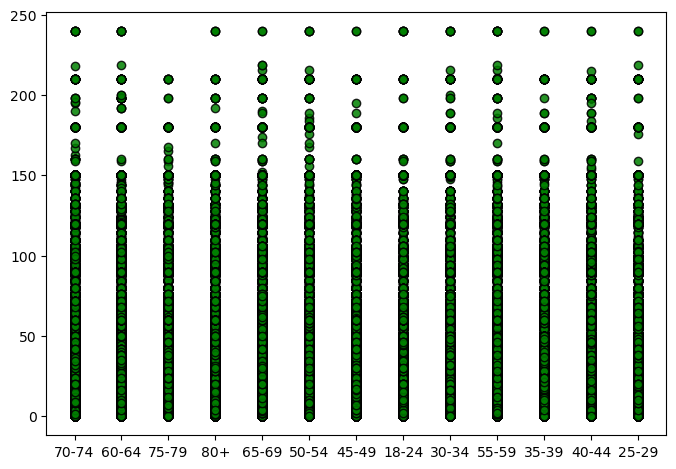

In [15]:
# plot scatter of age group and Healthy Diet
x_values = fruit_Veggie_df["Age Category"]
y_values = fruit_Veggie_df["Healthy Diet (Servings/Month)"]

plt.scatter(x_values, y_values, alpha=0.85, color='green',  edgecolors='black')
plt.xlabel = "Age Category"
plt.ylabel = "Fruit & Vegetable (Servings/Month)"

plt.show()

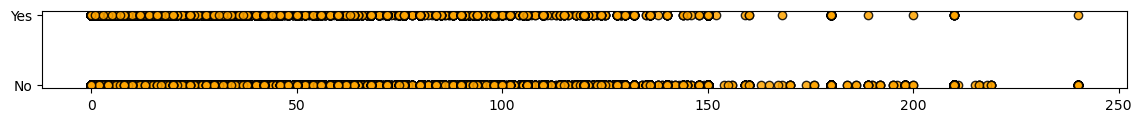

In [21]:
# fruit and vegetable servings versus incidents of heart disease
x_values = fruit_Veggie_df["Healthy Diet (Servings/Month)"]
y_values = fruit_Veggie_df["Heart Disease"]

plt.scatter(x_values, y_values, alpha=0.85, color='orange',  edgecolors='black')
plt.xlabel = "Age Category"
plt.ylabel = "Fruit & Vegetable (Servings/Month)"

plt.show()
